<h2>Establish connection</h2>

In [1]:
%reload_ext google.cloud.bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:\\Users\\Cermati\\AppData\\Roaming\\gcloud\\application_default_credentials.json"
print(os.environ["GOOGLE_APPLICATION_CREDENTIALS"])
from google.cloud import bigquery

import pandas as pd
import numpy as np
import Limit_util as c_lu
lu = c_lu.Limit_util()

C:\Users\Cermati\AppData\Roaming\gcloud\application_default_credentials.json


<h2>Get Data from BQ - Upgrade Limit group</h2>

In [48]:
grouped_cla = lu.get_group_cla()

# print(grouped_cla.head())
# print(grouped_cla.dtypes)

# check for duplicate orderId
print(grouped_cla.groupby(['updater_role','action','log_date','fee_scheme'],dropna=False).agg({
    'orderId' : 'count'
    # 'orderId' : ['count',pd.Series.nunique]
}))

C:\Users\Cermati\Anaconda3\lib\site-packages\google\auth\_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
                                                                              orderId
updater_role action                       log_date   fee_scheme                      
data-analyst UPGRADE_CREDIT_LIMIT_ACCOUNT 2021-02-09 INDODANA_GENERIC_SCHEME     6782
                                          2021-04-14 INDODANA_GENERIC_SCHEME     3539
                                          2021-04-16 TIKET_WHITELABEL_SCHEME    13409
                       

<h2>Get Data from BQ - User Historical records</h2>

In [ ]:
historical_data30 = lu.get_historical_data(-1,30)
historical_data45 = lu.get_historical_data(-1,45)
historical_data60 = lu.get_historical_data(-1,60)
historical_data90 = lu.get_historical_data(-1,90)


In [5]:
# print(historical_data30.head())
print(historical_data30.dtypes)

cla_group                   object
partner                     object
comparison_notes            object
orderId                     object
upgrade_limit_date          object
paylater_status             object
old_limit                   object
new_limit                   object
limit_addition_amount       object
limit_addition_rate         object
limit_usage_new             object
limit_usage_old             object
limit_usage_rate_new        object
limit_usage_rate_old        object
limit_usage_changes         object
category                    object
limit_usage_changes_rate    object
dtype: object


In [45]:
pd.set_option('display.max_colwidth', None)
# print(historical_data.groupby(['cla_group','partner'],dropna=False).agg({
#     'orderId' : ['count',pd.Series.nunique]
# }))
print(historical_data30[historical_data30['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT'].groupby(['partner','category','comparison_notes'],dropna=False).agg({
    'orderId' : 'count'
}))
print(historical_data45[historical_data45['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT'].groupby(['partner','category','comparison_notes'],dropna=False).agg({
    'orderId' : 'count'
}))
print(historical_data60[historical_data60['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT'].groupby(['partner','category','comparison_notes'],dropna=False).agg({
    'orderId' : 'count'
}))
print(historical_data90[historical_data90['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT'].groupby(['partner','category','comparison_notes'],dropna=False).agg({
    'orderId' : 'count'
}))

                                                                                   orderId
partner                 category           comparison_notes                               
INDODANA_GENERIC_SCHEME 0. Not Used At All 1d Before Upgrade to 30d After Upgrade     4260
                        1. No Changes      1d Before Upgrade to 30d After Upgrade       27
                        2. Usage Increase  1d Before Upgrade to 30d After Upgrade     1792
                        3. Usage Decrease  1d Before Upgrade to 30d After Upgrade      702
                                                                                   orderId
partner                 category           comparison_notes                               
INDODANA_GENERIC_SCHEME 0. Not Used At All 1d Before Upgrade to 45d After Upgrade     4195
                        1. No Changes      1d Before Upgrade to 45d After Upgrade       23
                        2. Usage Increase  1d Before Upgrade to 45d After Upgrade     1883

In [43]:
pd.set_option('display.max_colwidth', None)
# print(historical_data.groupby(['cla_group','partner'],dropna=False).agg({
#     'orderId' : ['count',pd.Series.nunique]
# }))
print(historical_data30[historical_data30['cla_group'] == '2021-04-14 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT'].groupby(['cla_group','partner','category','comparison_notes'],dropna=False).agg({
    'orderId' : 'count'
}))
print(historical_data45[historical_data45['cla_group'] == '2021-04-14 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT'].groupby(['cla_group','partner','category','comparison_notes'],dropna=False).agg({
    'orderId' : 'count'
}))
print(historical_data60[historical_data60['cla_group'] == '2021-04-14 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT'].groupby(['cla_group','partner','category','comparison_notes'],dropna=False).agg({
    'orderId' : 'count'
}))
print(historical_data90[historical_data90['cla_group'] == '2021-04-14 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT'].groupby(['cla_group','partner','category','comparison_notes'],dropna=False).agg({
    'orderId' : 'count'
}))

                                                                                                                                            orderId
cla_group                                                partner                 category           comparison_notes                               
2021-04-14 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT INDODANA_GENERIC_SCHEME 0. Not Used At All 1d Before Upgrade to 30d After Upgrade     1772
                                                                                 1. No Changes      1d Before Upgrade to 30d After Upgrade       26
                                                                                 2. Usage Increase  1d Before Upgrade to 30d After Upgrade     1110
                                                                                 3. Usage Decrease  1d Before Upgrade to 30d After Upgrade      633
                                                                                                                

In [44]:
pd.set_option('display.max_colwidth', None)
# print(historical_data.groupby(['cla_group','partner'],dropna=False).agg({
#     'orderId' : ['count',pd.Series.nunique]
# }))
print(historical_data30[historical_data30['cla_group'] == '2021-04-16 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT'].groupby(['cla_group','partner','category','comparison_notes'],dropna=False).agg({
    'orderId' : 'count'
}))
print(historical_data45[historical_data45['cla_group'] == '2021-04-16 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT'].groupby(['cla_group','partner','category','comparison_notes'],dropna=False).agg({
    'orderId' : 'count'
}))
print(historical_data60[historical_data60['cla_group'] == '2021-04-16 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT'].groupby(['cla_group','partner','category','comparison_notes'],dropna=False).agg({
    'orderId' : 'count'
}))
print(historical_data90[historical_data90['cla_group'] == '2021-04-16 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT'].groupby(['cla_group','partner','category','comparison_notes'],dropna=False).agg({
    'orderId' : 'count'
}))

                                                                                                                                            orderId
cla_group                                                partner                 category           comparison_notes                               
2021-04-16 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT TIKET_WHITELABEL_SCHEME 0. Not Used At All 1d Before Upgrade to 30d After Upgrade     6260
                                                                                 1. No Changes      1d Before Upgrade to 30d After Upgrade       92
                                                                                 2. Usage Increase  1d Before Upgrade to 30d After Upgrade     3063
                                                                                 3. Usage Decrease  1d Before Upgrade to 30d After Upgrade     3993
                                                                                                                

<AxesSubplot:xlabel='limit_usage_changes', ylabel='Count'>

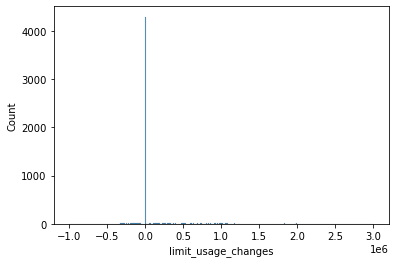

In [7]:
import seaborn as sns
hist_30 = historical_data30[historical_data30['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT']
sns.histplot(data=hist_30, x="limit_usage_changes")

<AxesSubplot:xlabel='limit_usage_changes', ylabel='Count'>

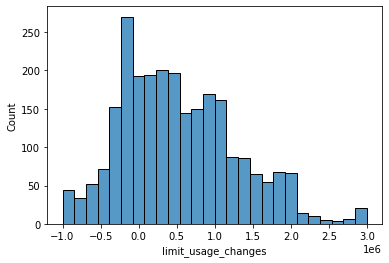

In [8]:
hist_30 = historical_data30[(historical_data30['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT') & (historical_data30['category'] != '0. Not Used At All')]
sns.histplot(data=hist_30, x="limit_usage_changes")

<AxesSubplot:xlabel='limit_usage_changes', ylabel='Count'>

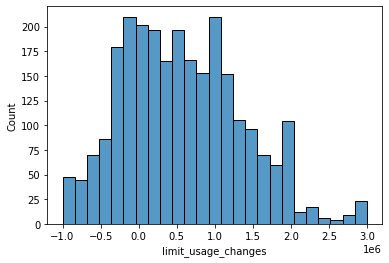

In [9]:
hist_45 = historical_data45[(historical_data45['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT') & (historical_data45['category'] != '0. Not Used At All')]
sns.histplot(data=hist_45, x="limit_usage_changes")

<AxesSubplot:xlabel='limit_usage_changes', ylabel='Count'>

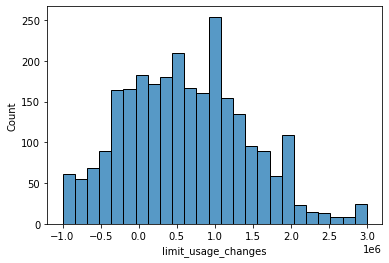

In [10]:
hist_60 = historical_data60[(historical_data60['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT') & (historical_data60['category'] != '0. Not Used At All')]
sns.histplot(data=hist_60, x="limit_usage_changes")

<AxesSubplot:xlabel='limit_usage_changes', ylabel='Count'>

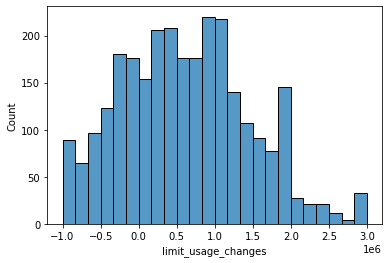

In [11]:
hist_90 = historical_data90[(historical_data90['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT') & (historical_data90['category'] != '0. Not Used At All')]
sns.histplot(data=hist_90, x="limit_usage_changes")

<AxesSubplot:xlabel='limit_usage_changes_rate', ylabel='Count'>

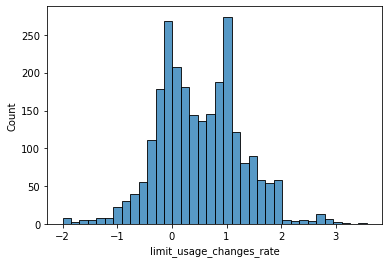

In [12]:
hist_30_rate = historical_data30[(historical_data30['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT') & (historical_data30['category'] != '0. Not Used At All')]
sns.histplot(data=hist_30_rate, x="limit_usage_changes_rate")

<AxesSubplot:xlabel='limit_usage_changes_rate', ylabel='Count'>

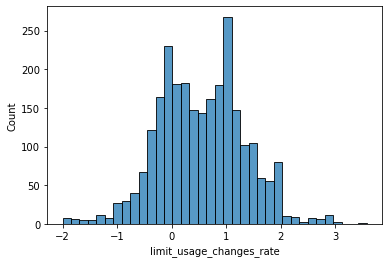

In [13]:
hist_45_rate = historical_data45[(historical_data45['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT') & (historical_data45['category'] != '0. Not Used At All')]
sns.histplot(data=hist_45_rate, x="limit_usage_changes_rate")

In [40]:
def set_group_by_usage_changes_rate(limit_usage_changes_rate) : 
    group_by_usage_changes_rate = ''
    if limit_usage_changes_rate < -1 : 
        group_by_usage_changes_rate = '(-) 1. < -100%'
    elif limit_usage_changes_rate < 0 : 
        group_by_usage_changes_rate = '(-) 2. < 0%'
    elif limit_usage_changes_rate == 0 :
        group_by_usage_changes_rate = '(0) 0%'
    elif limit_usage_changes_rate <= 0.25 :
        group_by_usage_changes_rate = '(+) 1. 0-25%'
    elif limit_usage_changes_rate <= 0.5 :
        group_by_usage_changes_rate = '(+) 2. 25-50%'
    elif limit_usage_changes_rate <= 0.75 :
        group_by_usage_changes_rate = '(+) 3. 50-75%'
    elif limit_usage_changes_rate <= 1 :
        group_by_usage_changes_rate = '(+) 4. 75-100%'
    elif limit_usage_changes_rate <= 1.5 :
        group_by_usage_changes_rate = '(+) 5. 100-150%'
    elif limit_usage_changes_rate <= 2 :
        group_by_usage_changes_rate = '(+) 6. 150-200%'
    else :
        group_by_usage_changes_rate = '(+) 7. > 200%'
    
    return group_by_usage_changes_rate


def set_group_by_limit_addition_rate(limit_addition_rate) : 
    group_by_limit_addition_rate = ''
    # if limit_addition_rate <= 0.25 : 
    #     group_by_limit_addition_rate = '1. <= 25%'
    if limit_addition_rate <= 0.5 : 
        group_by_limit_addition_rate = '1. <= 50%'
    # elif limit_addition_rate <= 0.75 :
    #     group_by_limit_addition_rate = '3. <= 75%'
    elif limit_addition_rate <= 1 :
        group_by_limit_addition_rate = '2. 50-100%'
    # elif limit_addition_rate <= 1.5 :
    #     group_by_limit_addition_rate = '5. <= 150%'
    elif limit_addition_rate <= 2 :
        group_by_limit_addition_rate = '3. 100-200%'
    else :
        group_by_limit_addition_rate = '4. > 200%'
    
    return group_by_limit_addition_rate

In [41]:
historical_data30['limit_usage_changes_rate'] = historical_data30['limit_usage_changes_rate'].astype(float)
historical_data30['limit_addition_rate'] = historical_data30['limit_addition_rate'].astype(float)
historical_data30['group_by_usage_changes_rate'] = historical_data30['limit_usage_changes_rate'].apply(set_group_by_usage_changes_rate)
historical_data30['group_by_limit_addition_rate'] = historical_data30['limit_addition_rate'].apply(set_group_by_limit_addition_rate)

historical_data45['limit_usage_changes_rate'] = historical_data45['limit_usage_changes_rate'].astype(float)
historical_data45['limit_addition_rate'] = historical_data45['limit_addition_rate'].astype(float)
historical_data45['group_by_usage_changes_rate'] = historical_data45['limit_usage_changes_rate'].apply(set_group_by_usage_changes_rate)
historical_data45['group_by_limit_addition_rate'] = historical_data45['limit_addition_rate'].apply(set_group_by_limit_addition_rate)

historical_data60['limit_usage_changes_rate'] = historical_data60['limit_usage_changes_rate'].astype(float)
historical_data60['limit_addition_rate'] = historical_data60['limit_addition_rate'].astype(float)
historical_data60['group_by_usage_changes_rate'] = historical_data60['limit_usage_changes_rate'].apply(set_group_by_usage_changes_rate)
historical_data60['group_by_limit_addition_rate'] = historical_data60['limit_addition_rate'].apply(set_group_by_limit_addition_rate)

In [35]:
# historical_data30.head()

In [39]:
print(historical_data30[(historical_data30['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT') & (historical_data30['category'] != '0. Not Used At All')].groupby(['comparison_notes','group_by_limit_addition_rate','group_by_usage_changes_rate'],dropna=False).agg({
    'orderId' : 'count'
}).sort_values(by=["group_by_limit_addition_rate","orderId"], ascending=False))
# 'category',

                                                                                                 orderId
comparison_notes                       group_by_limit_addition_rate group_by_usage_changes_rate         
1d Before Upgrade to 30d After Upgrade 3. 100-200%                  (-) 2. < 0%                      149
                                                                    (+) 1. 0-25%                     107
                                                                    (+) 5. 100-150%                   74
                                                                    (+) 4. 75-100%                    62
                                                                    (+) 2. 25-50%                     49
                                                                    (+) 3. 50-75%                     42
                                                                    (0) 0%                             6
                                       2. 50-100%      

In [36]:
historical_data30[(historical_data30['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT') & (historical_data30['category'] != '0. Not Used At All')].groupby(['comparison_notes','group_by_limit_addition_rate','group_by_usage_changes_rate'],dropna=False).agg({"orderId" : "count"})[["orderId"]].apply(lambda x: 100*x/x.sum()).sort_values(by=["group_by_limit_addition_rate","orderId"], ascending=False)

orderId
comparison_notes                       group_by_limit_addition_rate group_by_usage_changes_rate           
1d Before Upgrade to 30d After Upgrade 3. 100-200%                  (-) 2. < 0%                   5.910353
                                                                    (+) 1. 0-25%                  4.244347
                                                                    (+) 5. 100-150%               2.935343
                                                                    (+) 4. 75-100%                2.459342
                                                                    (+) 2. 25-50%                 1.943673
                                                                    (+) 3. 50-75%                 1.666006
                                                                    (0) 0%                        0.238001
                                       2. 50-100%                   (-) 2. < 0%                  15.470052
                                                                    (+) 5. 100-150%              10.511702
                                                                    (+) 4. 75-100%                8.052360
                                                                    (+) 1. 0-25%                  6.941690
                                                                    (+) 6. 150-200%               6.346688
                                                                    (+) 2. 25-50%                 6.307021
                                                                    (+) 3. 50-75%                 5.910353
                                                                    (0) 0%                        0.515668
                                       1. <= 50%                    (-) 2. < 0%                   4.958350
                                                                    (+) 5. 100-150%               3.054344
                                                                    (+) 4. 75-100%                2.578342
                                                                    (+) 3. 50-75%                 1.745339
                                                                    (+) 7. > 200%                 1.705672
                                                                    (+) 1. 0-25%                  1.626339
                                                                    (+) 2. 25-50%                 1.547005
                                                                    (+) 6. 150-200%               1.507338
                                                                    (-) 1. < -100%                1.507338
                                                                    (0) 0%                        0.317334

In [42]:
historical_data30.to_excel('Data30.xlsx',index=False)
historical_data45.to_excel('Data45.xlsx',index=False)
historical_data60.to_excel('Data60.xlsx',index=False)

In [ ]:
#gatauuu
# historical_data30[historical_data30['cla_group'] == '2021-02-09 - data-analyst - UPGRADE_CREDIT_LIMIT_ACCOUNT'].groupby(['category','group_by_usage_changes_rate','comparison_notes'], dropna=False).agg({"orderId" : "count"})[["orderId"]].apply(lambda x: [x,100*x/x.sum()], axis=0,result_type='expand')